In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('all_data.csv')
df.head()

,Country,Year,Life expectancy at birth (years),GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


## Exploration of Data

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 4 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Country                           96 non-null     object 
 1   Year                              96 non-null     int64  
 2   Life expectancy at birth (years)  96 non-null     float64
 3   GDP                               96 non-null     float64
dtypes: float64(2), int64(1), object(1)
memory usage: 3.1+ KB


In [4]:
df.rename(columns={'Life expectancy at birth (years)' : 'Life expectancy'}, inplace=True)
df.head()

,Country,Year,Life expectancy,GDP
0,Chile,2000,77.3,7.786093e+10
1,Chile,2001,77.3,7.097992e+10
2,Chile,2002,77.8,6.973681e+10
3,Chile,2003,77.9,7.564346e+10
4,Chile,2004,78.0,9.921039e+10


In [5]:
df['Life expectancy'].describe().apply("{0:.3f}".format)

count    96.000
mean     72.790
std      10.673
min      44.300
25%      74.475
50%      76.750
75%      78.900
max      81.000
Name: Life expectancy, dtype: object

In [6]:
df['GDP'].describe()

count    9.600000e+01
mean     3.880499e+12
std      5.197561e+12
min      4.415703e+09
25%      1.733018e+11
50%      1.280220e+12
75%      4.067510e+12
max      1.810000e+13
Name: GDP, dtype: float64

In [7]:
countries = df['Country'].unique().tolist()
countries

['Chile', 'China', 'Germany', 'Mexico', 'United States of America', 'Zimbabwe']

## Analyzing Life Expectancy by Multiple Factors

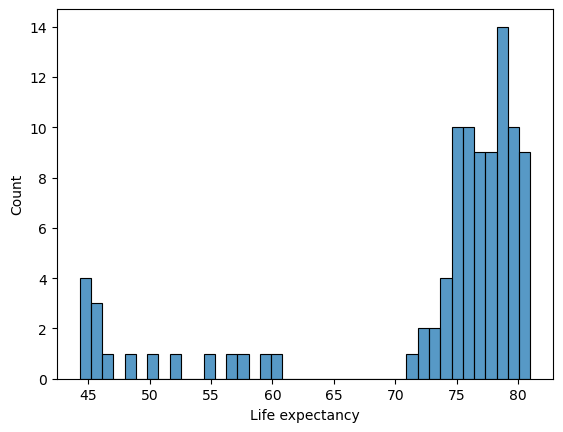

In [8]:
# distribution of life expectation
sns.histplot(df['Life expectancy'], bins=40)
plt.show()

In [9]:
# Comparing importance of life expectancy smaller than 65
le_under_65 = df[df['Life expectancy']<65].shape[0]
le_under_65
print(f'The number of records with life expectancy smaller thant 65 is {le_under_65} and it takes about {np.round(le_under_65/df.shape[0],3)} of the whole data.')

The number of records with life expectancy smaller thant 65 is 16 and it takes about 0.167 of the whole data.


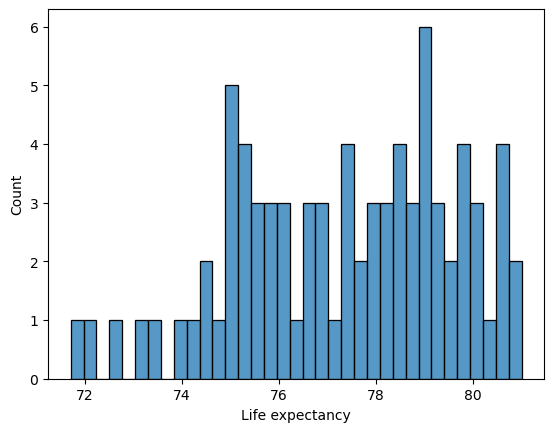

In [10]:
# Plotting a count plot of life expectancy bigger than 70
le_over_70 = df[df['Life expectancy']>=70]
sns.histplot(le_over_70['Life expectancy'],bins=35)
plt.show()

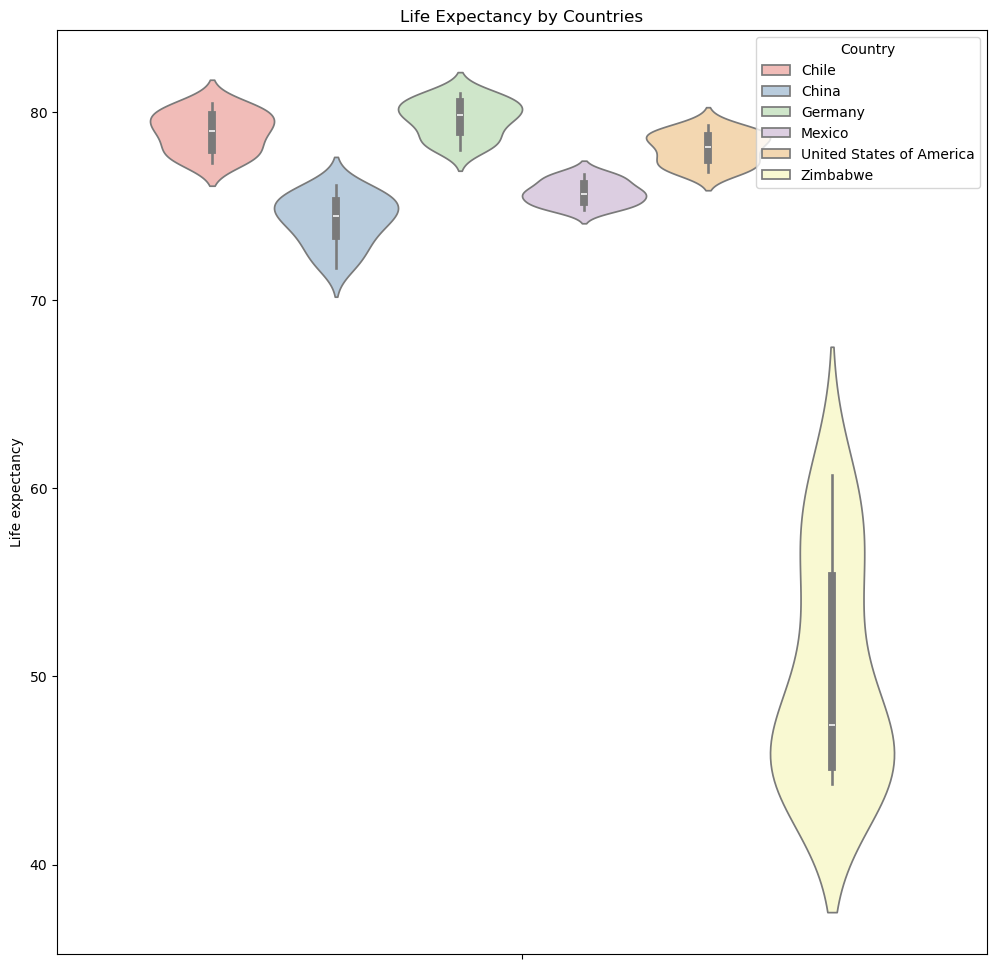

In [11]:
plt.figure(figsize=(12,12))
plt.title('Life Expectancy by Countries')
sns.violinplot(y='Life expectancy', hue='Country', data=df, palette='Pastel1')
plt.show()

From this graph above, it is obvious that the life expectancy in Zimbabwe is way lower than the other countries.
To have a closer look those other countries' life expectation distribution, I made another violin plot of these 5 countries separately.

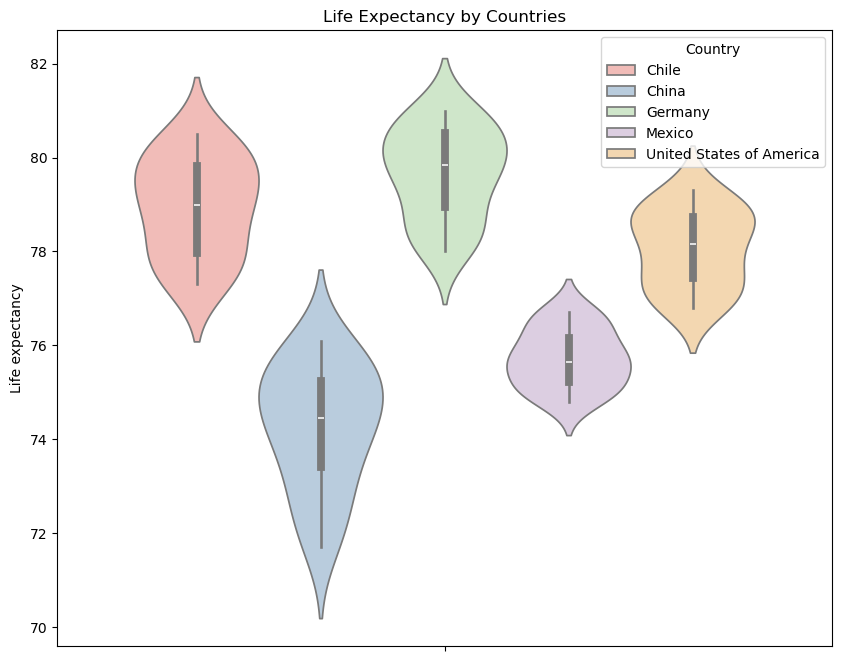

In [12]:
plt.figure(figsize=(10,8))
plt.title('Life Expectancy by Countries')
sns.violinplot(y='Life expectancy', hue='Country', data=df[df['Country'] != 'Zimbabwe'], palette='Pastel1')
plt.show()

Based on the graph above, I can conclude that Germany has the highest average life expectancy among these six countries. Additionally, China exhibits a wider range of life expectancy compared to the other countries, with the exception of Zimbabwe.

### Is GDP related to each country's life expectancy?
I wanted to determine if there is a relationship between a country's GDP and its life expectancy. Since Zimbabwe was found to have the lowest average life expectancy and Germany the highest, if their GDPs are also the lowest and the highest respectively, it would suggest a correlation between GDP and life expectancy.

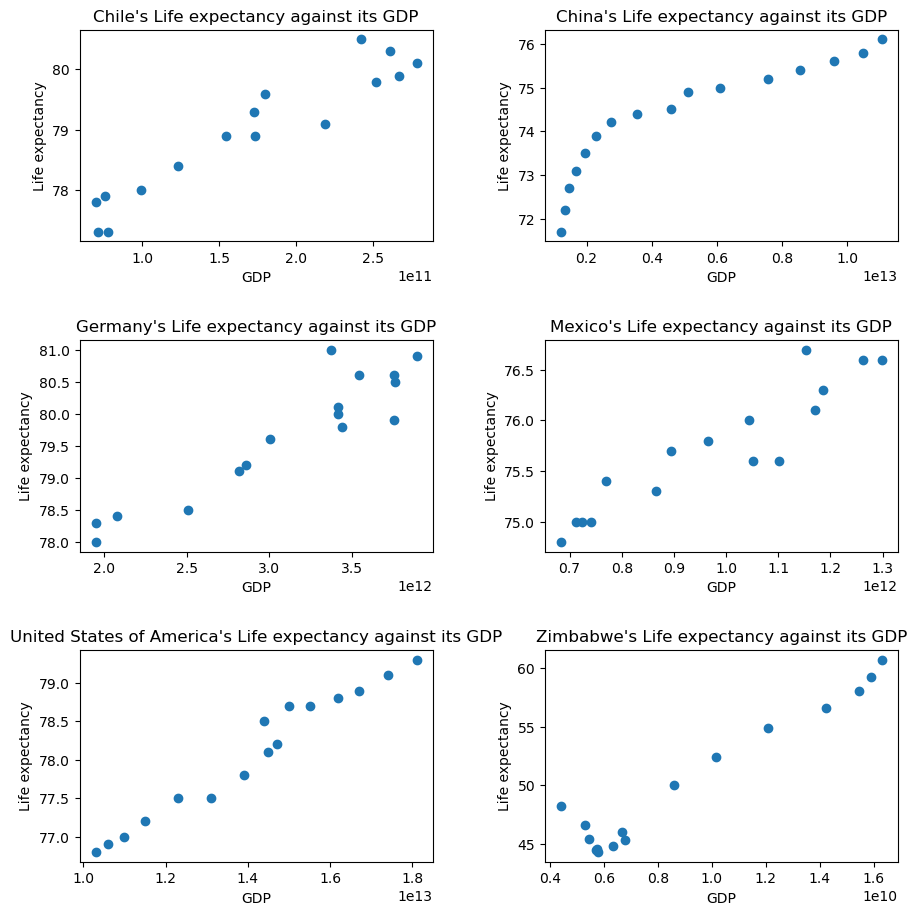

In [13]:
fig, axes = plt.subplots(3,2,figsize=(10,10))
fig.tight_layout(pad=5.0)
i=0
for r in range(3) :
    for c in range(2) :
        axes[r][c].scatter(x='GDP', y='Life expectancy', data=df[df['Country']==countries[i]])
        axes[r][c].set_title(f'{countries[i]}\'s Life expectancy against its GDP')
        axes[r][c].set_xlabel('GDP')
        axes[r][c].set_ylabel('Life expectancy')
        i+=1
plt.show()

From these graphs, I observed positive correlations between GDP and life expectancy across all countries.

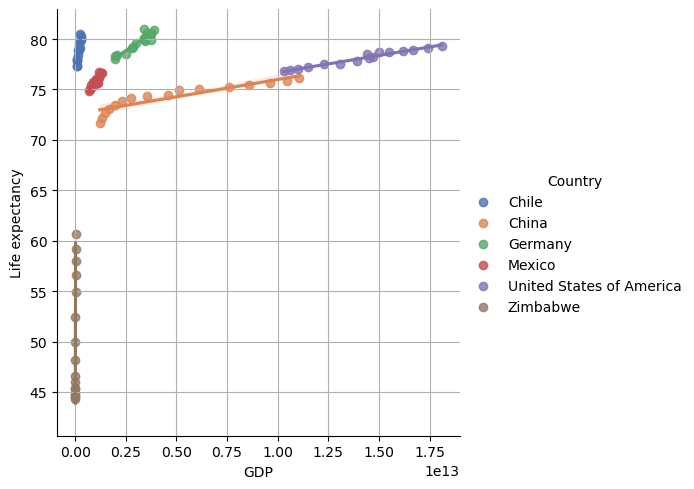

In [16]:
sns.lmplot(x='GDP', y='Life expectancy', data=df, hue='Country', palette='deep')
plt.grid()
plt.show()

Now I can see the relationship more precisely. However, Germany did not have the highest GDP when it had the highest life expectancy. The United States of America had the highest GDP during that period.

From these analyses, I identified three major points:

1. Outliers:
   When examining the relationship between life expectancy and other factors, Zimbabwe's overall life expectancy was significantly lower than that of other countries, making it an outlier in the dataset.
2. Positive Correlation:
   There appears to be a positive correlation between life expectancy and GDP in the data, indicating that as GDP increases, life expectancy tends to rise as well.
3. Differences by Country:
   It was observed that life expectancy varies depending on the country in which a person resides."

### Is life expectancy increasing over time?

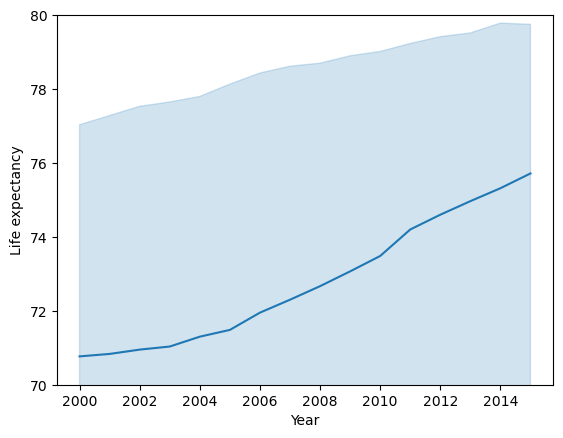

In [15]:
sns.lineplot(x="Year", y="Life expectancy", data=df)
plt.ylim(70,80)
plt.show()

It appears that life expectancy increases over time and reaches its highest point in the most recent period.